# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
#Install citypy - Note to add an "!" in front of pip when downloading packages in the cloud
!pip install citipy

In [32]:
#Initiate Dependencies and Setup

import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import textwrap
from scipy.stats import linregress
from pprint import pprint   #pretty print api data structures
from random import uniform  #will enable random sampling of weatherAPI data
from citipy import citipy   #to use nearest_city method from citipy
#import sys
#sys.path.insert(0, 'path/to/your/py_file')
#import py_file

#config = "Resources/config.py"
from config import weather_api_key
from config import g_key

url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'


## Generate Cities List
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
cities = []
weather = []
city_counter = 0

while len(cities) < 550:

    #Generate random city to search
    longitude = round(uniform(-180,180),3) #this returns a random float. Parameters define lower and upper limits
    latitude = round(uniform(-90, 90), 3) #this returns a random float. Parameters define lower and upper limits
    
    city = citipy.nearest_city(latitude, longitude)
    city_name = city.city_name
    country_code = city.country_code
    
    random_city = (f'{city_name}, {country_code}')
    
    if random_city not in cities:     #this should take care of duplicates
    #Perform API call
        query_url = url + city_name + ',' + country_code + "&APPID=" + weather_api_key + "&units=" + units
        response = requests.get(query_url)
        weather_json = response.json()

        if weather_json['cod'] == 200:
            id = weather_json['id']
            city_name = weather_json['name']
            cities.append(random_city)
            weather.append(weather_json)
            city_counter += 1
           
            #Print Log
            print(f'Processing Record {city_counter} | {id} {city_name}')
   
        else:
            pass


Processing Record 1 | 3833367 Ushuaia
Processing Record 2 | 4013679 Coahuayana Viejo
Processing Record 3 | 2163355 Hobart
Processing Record 4 | 5779548 Payson
Processing Record 5 | 2110227 Butaritari
Processing Record 6 | 2077963 Albany
Processing Record 7 | 4030556 Rikitea
Processing Record 8 | 3652764 Puerto Ayora
Processing Record 9 | 5960603 Geraldton
Processing Record 10 | 2125693 Evensk
Processing Record 11 | 1502073 Krasnosel'kup
Processing Record 12 | 1852357 Shimoda
Processing Record 13 | 6111862 Port Hardy
Processing Record 14 | 3366880 Hermanus
Processing Record 15 | 2180815 Tuatapere
Processing Record 16 | 609924 Emba
Processing Record 17 | 3874787 Punta Arenas
Processing Record 18 | 4020109 Atuona
Processing Record 19 | 1488616 Uk
Processing Record 20 | 2460954 Araouane
Processing Record 21 | 876177 Luau
Processing Record 22 | 4032243 Vaini
Processing Record 23 | 1490256 Talnakh
Processing Record 24 | 2012530 Zhigansk
Processing Record 25 | 1106677 Bambous Virieux
Processi

Processing Record 203 | 2159220 Mackay
Processing Record 204 | 3424607 Tasiilaq
Processing Record 205 | 2144604 Warragul
Processing Record 206 | 2109528 Buala
Processing Record 207 | 4392768 Joplin
Processing Record 208 | 140463 Birjand
Processing Record 209 | 3939761 Hualmay
Processing Record 210 | 1494482 Polunochnoye
Processing Record 211 | 2123814 Leningradskiy
Processing Record 212 | 1244926 Hambantota
Processing Record 213 | 1263942 Manavālakurichi
Processing Record 214 | 679248 Dobreşti
Processing Record 215 | 4947459 Pittsfield
Processing Record 216 | 2138555 Poum
Processing Record 217 | 2032201 Bulgan
Processing Record 218 | 1024312 Mocuba
Processing Record 219 | 1267390 Kavaratti
Processing Record 220 | 886763 Masvingo
Processing Record 221 | 5742974 North Bend
Processing Record 222 | 2630299 Hofn
Processing Record 223 | 5972291 Havre-St-Pierre
Processing Record 224 | 3598787 Champerico
Processing Record 225 | 2132606 Samarai
Processing Record 226 | 3665199 Ariquemes
Processi

Processing Record 402 | 1538638 Lokomotivnyy
Processing Record 403 | 1337606 Eydhafushi
Processing Record 404 | 6144312 Sept-Îles
Processing Record 405 | 863061 Usinsk
Processing Record 406 | 1526970 Abay
Processing Record 407 | 1633419 Padang
Processing Record 408 | 5859699 College
Processing Record 409 | 3143244 Lofthus
Processing Record 410 | 3407762 Amapá
Processing Record 411 | 1786855 Yatou
Processing Record 412 | 2377457 Nouadhibou
Processing Record 413 | 2016680 Shirokiy
Processing Record 414 | 3893629 Coquimbo
Processing Record 415 | 2013279 Vostok
Processing Record 416 | 2447416 Ayorou
Processing Record 417 | 187231 Maua
Processing Record 418 | 778362 Øksfjord
Processing Record 419 | 1636426 Manggar
Processing Record 420 | 2177069 Ballina
Processing Record 421 | 5767918 Pierre
Processing Record 422 | 3985168 San Patricio
Processing Record 423 | 1650232 Banjar
Processing Record 424 | 1738050 Marabu
Processing Record 425 | 933692 Kang
Processing Record 426 | 2098329 Daru
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create Dataframe that contains sample city population along with weather data
city_df = pd.DataFrame.from_dict(weather, orient='columns')

# Export city_df to csv (unflattened)
city_df.to_csv("../Output/citydata.csv", index=False, header=True)

# Flatten city_df dataframe
city_df = pd.concat([city_df, city_df['coord'].apply(pd.Series)], axis = 1).drop('coord', axis =1)
city_df = pd.concat([city_df, city_df['main'].apply(pd.Series)], axis = 1).drop('main', axis =1)
city_df = pd.concat([city_df, city_df['wind'].apply(pd.Series)], axis = 1).drop('wind', axis =1)
city_df = pd.concat([city_df, city_df['sys'].apply(pd.Series)], axis = 1).drop('sys', axis =1)
city_df = pd.concat([city_df, city_df['weather'].apply(pd.Series)], axis = 1).drop('weather', axis =1)
city_df = pd.concat([city_df, city_df['clouds'].apply(pd.Series)], axis = 1).drop('clouds', axis =1)

# Ensure there are no duplicated column names
cols=pd.Series(city_df.columns)

for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
city_df.columns=cols

# Export flattened city_df to csv 
city_df.to_csv("../Output/citydata_flat.csv", index=False, header=True)

# Rename and display DataFrame
city_df = city_df[['id', 'name', 'country', 'lat', 'lon', 'temp', 'temp_max', 'temp_min', 'humidity', 'all', 'speed']]
city_df = city_df.rename(columns = {'lat':'latitude', 'lon':'longitude','all': 'cloudiness', 'speed': 'wind_speed'})
city_df.head()



,id,name,country,latitude,longitude,temp,temp_max,temp_min,humidity,cloudiness,wind_speed
0,3833367,Ushuaia,AR,-54.80,-68.30,41.00,41.00,41.00,75.0,40,4.85
1,4013679,Coahuayana Viejo,MX,18.73,-103.68,80.47,80.47,80.47,84.0,99,2.64
2,2163355,Hobart,AU,-42.88,147.33,63.27,66.99,60.80,51.0,40,5.82
3,5779548,Payson,US,40.04,-111.73,57.07,57.99,55.99,62.0,1,6.93
4,2110227,Butaritari,KI,3.07,172.79,82.38,82.38,82.38,73.0,46,10.36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_city_df = city_df[city_df['humidity']<100]
clean_city_df = clean_city_df.reset_index(drop=True)
clean_city_df

#Export clean_city_df to csv 
clean_city_df.to_csv("../Output/clean_citydata_flat.csv", index=False, header=True)
clean_city_df.head()

,id,name,country,latitude,longitude,temp,temp_max,temp_min,humidity,cloudiness,wind_speed
0,3833367,Ushuaia,AR,-54.80,-68.30,41.00,41.00,41.00,75.0,40,4.85
1,4013679,Coahuayana Viejo,MX,18.73,-103.68,80.47,80.47,80.47,84.0,99,2.64
2,2163355,Hobart,AU,-42.88,147.33,63.27,66.99,60.80,51.0,40,5.82
3,5779548,Payson,US,40.04,-111.73,57.07,57.99,55.99,62.0,1,6.93
4,2110227,Butaritari,KI,3.07,172.79,82.38,82.38,82.38,73.0,46,10.36


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

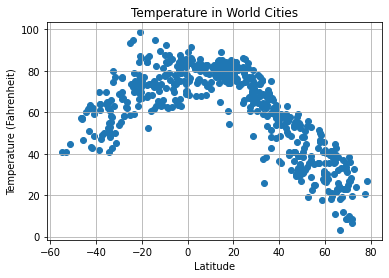

Background: This code retrieves both Temperature and Latitude for each city in our dataframe to 
produce a scatter plot diagram for us to observe the relationship between both variables.

Observation: Temperatures rise as we approach the equator and fall as we move away from the
equator to the North Pole or South Pole.


In [56]:
# Build a scatter plot
plt.scatter(clean_city_df["latitude"], clean_city_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/TemperatureInWorldCities.png")

# Show plot
plt.show()

# Add a 1 -2 sentences on what the codes is and analyzing
value_purpose = """Background: This code retrieves both Temperature and Latitude for each city in our dataframe to 
produce a scatter plot diagram for us to observe the relationship between both variables.\n"""

value_observation = """Observation: Temperatures rise as we approach the equator and fall as we move away from the
equator to the North Pole or South Pole."""

wrapper = textwrap.TextWrapper(width=50) 
purpose = wrapper.wrap(text=value_purpose) 
observation = wrapper.wrap(text=value_observation)

print(value_purpose)
print(value_observation)

## Latitude vs. Humidity Plot

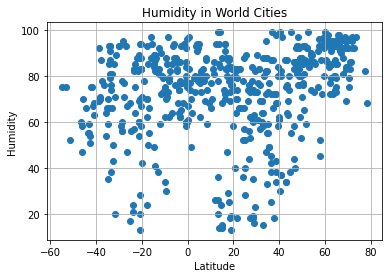

Background: This code retrieves both Humidity and Latitude for each city in our dataframe to 
produce a scatter plot diagram for us to observe the relationship between both variables.

Observation: Between -10 and 10 latitude, we see consistent high humidity measurements.  There 
is less land mass within this range compared to others.  Land masses in this area are relatively small and surrounded 
by large bodies of water (ex. ocean). High temperatures as we approach the equator and moisture from the ocean explains the high humidity near the equator.


In [68]:
# Build a scatter plot
plt.scatter(clean_city_df["latitude"], clean_city_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/HumidityInWorldCities.png")

# Show plot
plt.show()

# Add a 1 -2 sentences on what the codes is and analyzing
value_purpose = """Background: This code retrieves both Humidity and Latitude for each city in our dataframe to 
produce a scatter plot diagram for us to observe the relationship between both variables.\n"""

value_observation = """Observation: Between -10 and 10 latitude, we see consistent high humidity measurements.  There 
is less land mass within this range compared to others.  Land masses in this area are relatively small and surrounded 
by large bodies of water (ex. ocean). High temperatures as we approach the equator and moisture from the ocean explains the high humidity near the equator."""

wrapper = textwrap.TextWrapper(width=50) 
purpose = wrapper.wrap(text=value_purpose) 
observation = wrapper.wrap(text=value_observation)

print(value_purpose)
print(value_observation)

## Latitude vs. Cloudiness Plot

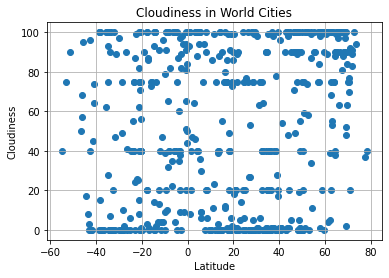

Background: This code retrieves both Cloudiness and Latitude for each city in our dataframe to 
produce a scatter plot diagram for us to observe the relationship between both variables.

Observation: There is no clear correlation between Cloudiness and Latitude.


In [69]:
# Build a scatter plot
plt.scatter(clean_city_df["latitude"], clean_city_df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/CloudinessInWorldCities.png")

# Show plot
plt.show()

# Add a 1 -2 sentences on what the codes is and analyzing
value_purpose = """Background: This code retrieves both Cloudiness and Latitude for each city in our dataframe to 
produce a scatter plot diagram for us to observe the relationship between both variables.\n"""

value_observation = """Observation: There is no clear correlation between Cloudiness and Latitude."""

wrapper = textwrap.TextWrapper(width=50) 
purpose = wrapper.wrap(text=value_purpose) 
observation = wrapper.wrap(text=value_observation)

print(value_purpose)
print(value_observation)

## Latitude vs. Wind Speed Plot

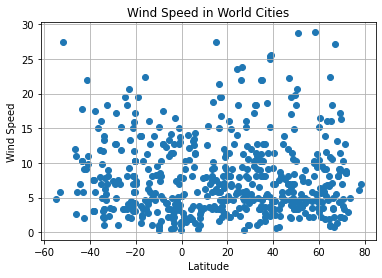

Background: This code retrieves both Cloudiness and Latitude for each city in our dataframe to 
produce a scatter plot diagram for us to observe the relationship between both variables.

Observation: There is no clear correlation between Wind Speed and Latitude.


In [75]:
# Build a scatter plot
plt.scatter(clean_city_df["latitude"], clean_city_df["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output/WindSpeedInWorldCities.png")

# Show plot
plt.show()

# Add a 1 -2 sentences on what the codes is and analyzing
value_purpose = """Background: This code retrieves both Cloudiness and Latitude for each city in our dataframe to 
produce a scatter plot diagram for us to observe the relationship between both variables.\n"""

value_observation = """Observation: There is no clear correlation between Wind Speed and Latitude."""

wrapper = textwrap.TextWrapper(width=50) 
purpose = wrapper.wrap(text=value_purpose) 
observation = wrapper.wrap(text=value_observation)

print(value_purpose)
print(value_observation)

## Linear Regression

In [19]:
# Create Northern hemisphere df
northern_hemisphere_df = clean_city_df[city_df['latitude']>=0]
northern_hemisphere_df = northern_hemisphere_df.reset_index(drop=True)
northern_hemisphere_df.head()


C:\Users\findv\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,name,country,latitude,longitude,temp,temp_max,temp_min,humidity,cloudiness,wind_speed
0,4013679,Coahuayana Viejo,MX,18.73,-103.68,80.47,80.47,80.47,84.0,99,2.64
1,5779548,Payson,US,40.04,-111.73,57.07,57.99,55.99,62.0,1,6.93
2,2110227,Butaritari,KI,3.07,172.79,82.38,82.38,82.38,73.0,46,10.36
3,5960603,Geraldton,CA,49.73,-86.95,30.20,30.20,30.20,80.0,90,3.36
4,2125693,Evensk,RU,61.95,159.23,35.35,35.35,35.35,84.0,100,3.47


In [20]:
# Create Southern hemisphere df
southern_hemisphere_df = clean_city_df[city_df['latitude']<0]
southern_hemisphere_df = southern_hemisphere_df.reset_index(drop=True)
southern_hemisphere_df.head()

C:\Users\findv\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,name,country,latitude,longitude,temp,temp_max,temp_min,humidity,cloudiness,wind_speed
0,3833367,Ushuaia,AR,-54.80,-68.30,41.00,41.00,41.00,75.0,40,4.85
1,2163355,Hobart,AU,-42.88,147.33,63.27,66.99,60.80,51.0,40,5.82
2,2077963,Albany,AU,-35.02,117.89,64.40,64.40,64.40,59.0,75,16.11
3,4030556,Rikitea,PF,-23.12,-134.97,74.08,74.08,74.08,75.0,24,9.31
4,3652764,Puerto Ayora,EC,-0.74,-90.35,69.01,69.01,69.01,92.0,94,8.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4059342197318615


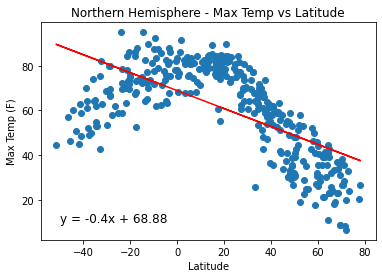

A correlation between temperature and latitude in the Northern Hemisphere but is neighter a strong
positive nor strong negative correlation. There exists a moderate linear correlation but there is definitely a non-linear
correlation as depicted by the upside down u-shape of the scatter plot.


In [90]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_hemisphere_df['latitude'].astype('float')
y_values = northern_hemisphere_df['temp_max'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=12,color="black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/MaxTempvsLatitude_North.png")

# Show plot
plt.show()

# Explain what the linear regression is modeling such as any relationships you notice and any other analysis done
value_comments = """A correlation between temperature and latitude in the Northern Hemisphere but is neighter a strong
positive nor strong negative correlation. There exists a moderate linear correlation but there is definitely a non-linear
correlation as depicted by the upside down u-shape of the scatter plot."""

wrapper = textwrap.TextWrapper(width=50) 
comments = wrapper.wrap(text=value_comments) 

print(value_comments)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.24651238591808383


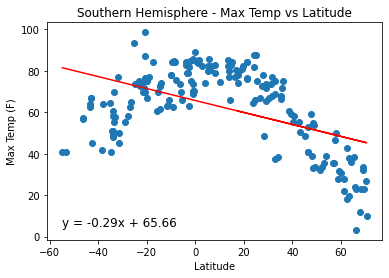

There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0.


In [93]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_hemisphere_df['latitude'].astype('float')
y_values = southern_hemisphere_df['temp_max'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=12,color="black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/MaxTempvsLatitude_South.png")

# Show plot
plt.show()

# Explain what the linear regression is modeling such as any relationships you notice and any other analysis done
value_comments = """There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0."""

wrapper = textwrap.TextWrapper(width=50) 
comments = wrapper.wrap(text=value_comments) 

print(value_comments)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.06274104124410318


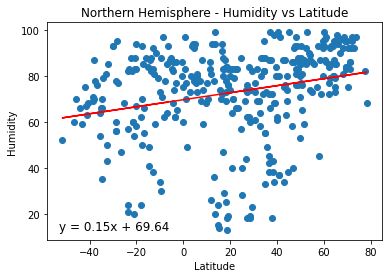

There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0.


In [102]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_hemisphere_df['latitude'].astype('float')
y_values = northern_hemisphere_df['humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,13),fontsize=12,color="black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/HumidityvsLatitude_North.png")

# Show plot
plt.show()

# Explain what the linear regression is modeling such as any relationships you notice and any other analysis done
value_comments = """There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0."""

wrapper = textwrap.TextWrapper(width=50) 
comments = wrapper.wrap(text=value_comments) 

print(value_comments)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0258212349331183


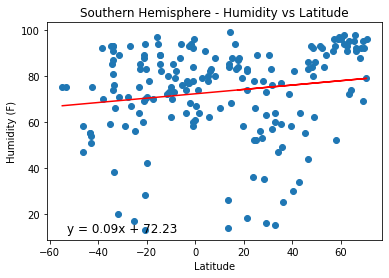

There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0.


In [104]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_hemisphere_df['latitude'].astype('float')
y_values = southern_hemisphere_df['humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,12),fontsize=12,color="black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (F)')
plt.title('Southern Hemisphere - Humidity vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/HumidityvsLatitude_South.png")

# Show plot
plt.show()

# Explain what the linear regression is modeling such as any relationships you notice and any other analysis done
value_comments = """There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0."""

wrapper = textwrap.TextWrapper(width=50) 
comments = wrapper.wrap(text=value_comments) 

print(value_comments)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.037229044211395716


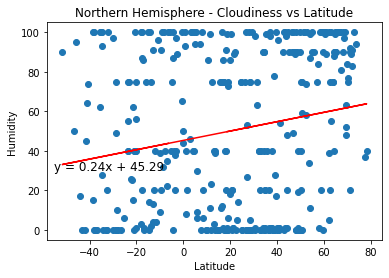

There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0.


In [112]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_hemisphere_df['latitude'].astype('float')
y_values = northern_hemisphere_df['cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Cloudiness vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/CloudinessvsLatitude_North.png")

# Show plot
plt.show()

# Explain what the linear regression is modeling such as any relationships you notice and any other analysis done
value_comments = """There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0."""

wrapper = textwrap.TextWrapper(width=50) 
comments = wrapper.wrap(text=value_comments) 

print(value_comments)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03913188326432516


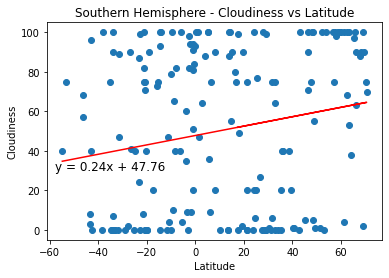

There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0.


In [113]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_hemisphere_df['latitude'].astype('float')
y_values = southern_hemisphere_df['cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-58,30),fontsize=12,color="black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/CloudinessvsLatitude_South.png")

# Show plot
plt.show()

# Explain what the linear regression is modeling such as any relationships you notice and any other analysis done
value_comments = """There is no linear relationship based on this data which is supported with the absolute value of r being so close to 0."""

wrapper = textwrap.TextWrapper(width=50) 
comments = wrapper.wrap(text=value_comments) 

print(value_comments)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0006509441305859879


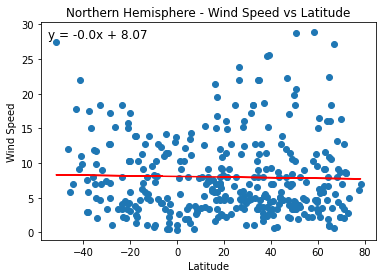

There is no linear relationship based on this data which is supported with the absolute value of r equal to 0.


In [116]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_hemisphere_df['latitude'].astype('float')
y_values = northern_hemisphere_df['wind_speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,28),fontsize=12,color="black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/WindSpeedvsLatitude_North.png")

# Show plot
plt.show()

# Explain what the linear regression is modeling such as any relationships you notice and any other analysis done
value_comments = """There is no linear relationship based on this data which is supported with the absolute value of r equal to 0."""

wrapper = textwrap.TextWrapper(width=50) 
comments = wrapper.wrap(text=value_comments) 

print(value_comments)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0003070657672542858


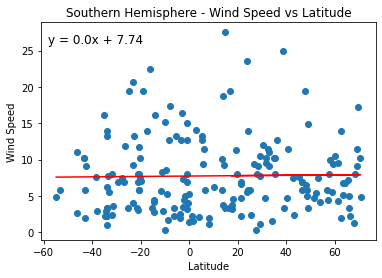

There is no linear relationship based on this data which is supported with the absolute value of r equal to 0.


In [118]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_hemisphere_df['latitude'].astype('float')
y_values = southern_hemisphere_df['wind_speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-58,26),fontsize=12,color="black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("../Output/WindSpeedvsLatitude_South.png")

# Show plot
plt.show()

# Explain what the linear regression is modeling such as any relationships you notice and any other analysis done
value_comments = """There is no linear relationship based on this data which is supported with the absolute value of r equal to 0."""

wrapper = textwrap.TextWrapper(width=50) 
comments = wrapper.wrap(text=value_comments) 

print(value_comments)